__Vamos a realizar predicciones con un árbol de regresión.__

Realiza la siguiente actividad siguiendo las instrucciones y apoyándote de las libretas vistas durante la semana.

__Instrucción 1__

<p style='text-align: justify;'>Importa la paquetería de "Pandas", "Numpy", "Matplotlib" y asegúrate de que las visualizaciones se grafiquen en el cuaderno utilizando la instrucción "%matplotlib inline" y abre el archivo "Mall_Customers.csv" en tu libreta de Jupyter.</p>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Mall_Customers.csv")

__Instrucción 2__

<p style='text-align: justify;'>Muestras las primeras 5 filas de tu tabla y describe el contenido.</p>

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


__Instrucción 3__

<p style='text-align: justify;'>Elimina la columna "Gender" y "CustomersID". Luego crea una variable que contenga a toda la columna "Gender".</p>

In [5]:
df1 = df
df1 = df1.drop('Gender', axis = 1)

In [6]:
df1 = df1.drop('CustomerID', axis = 1)

In [7]:
gender = df['Gender']

__Instrucción 4__

<p style='text-align: justify;'>Muestra el nuevo DataFrame sin las dos columnas.</p>

In [8]:
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


__Instrucción 5__

<p style='text-align: justify;'>Muestra a la columna separada del Dataframe que contiene los datos del género de los clientes.</p>

In [9]:
df['Gender']

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

__Instrucción 6__

<p style='text-align: justify;'>Muestra la cantidad de hombres y mujeres que posee la columna "Gender"</p>

In [10]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

__Instrucción 7__

<p style='text-align: justify;'>Separa las variables "X" y "Y" en conjuntos de entrenamiento y prueba, utilizando el método train_test_split de la librería sklearn.model_selection.</p>

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df1
y = df['Gender']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30)

__Instrucción 8__

<p style='text-align: justify;'>Construye un modelo de Árbol de Regresión usando "DecisionTreeClassifier" de la librería sklearn.tree. El árbol debe de tener una profundidad de 4 niveles.

Recuerda preparar el arbol con los "labels" correctos. Utiliza las variables de entrenamiento en el árbol.</p>

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
clf = DecisionTreeClassifier(max_depth=4)

In [17]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [21]:
feature_labels = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
feature_labels

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [22]:
class_labels = ['Male', 'Female']
class_labels

['Male', 'Female']

__Instrucción 9__

<p style='text-align: justify;'>Exporta el árbol de regresión a formato .ps utilizando la función 'export_graphviz' de la paquetería 'sklearn.tree'. Después utiliza cualquiera de las herramientas vistas en los videos para generar una imagen de árbol de regresión.</p>

In [24]:
from sklearn.tree import export_graphviz

In [25]:
export_graphviz(clf, out_file='Gender.ps',
                feature_names=feature_labels,
                class_names=class_labels,
                filled=True,
                rounded=True)

__Instrucción 10__

<p style='text-align: justify;'>Inserta la imagen de tu árbol de regresión en la libreta, utilizando una celda tipo "Markdown" </p>

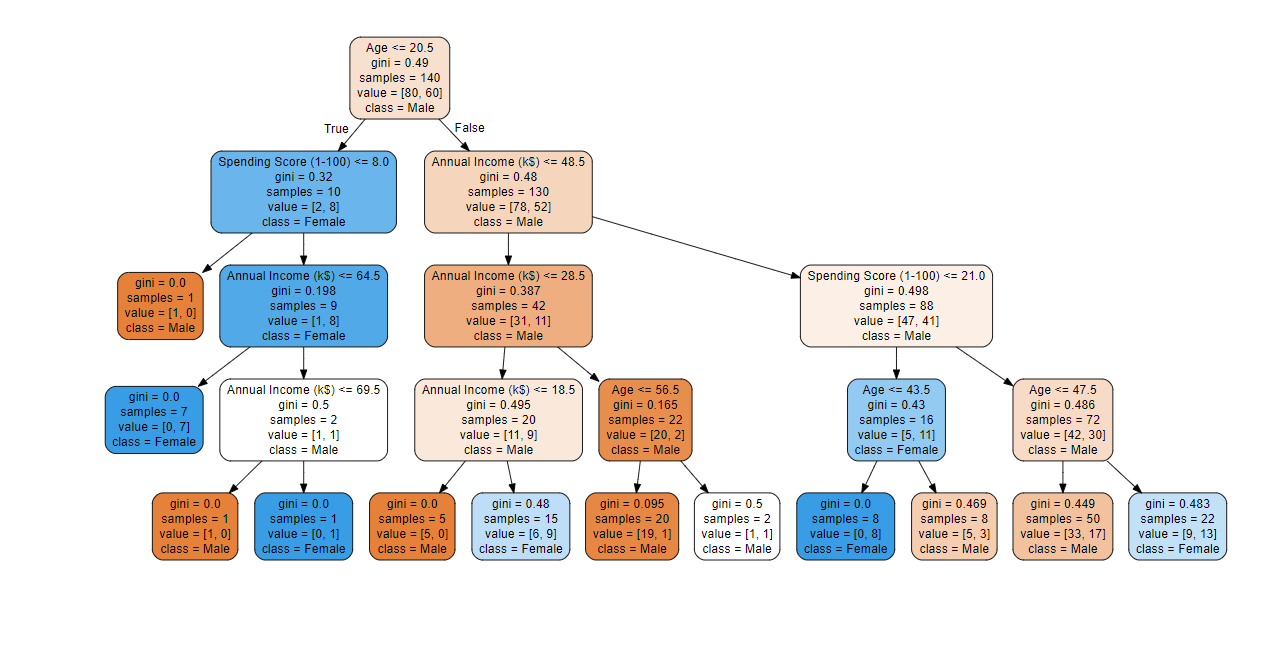

__Instrucción 11__

<p style='text-align: justify;'>Construye una Matriz de Confusión usando "confusion_matrix" de la librería sklearn.metrics. Después, utiliza las variables X_train y X_test para realizar las predicciones con tu arbol de regresión.</p>

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
y_train_predict= clf.predict(x_train)
y_test_predict= clf.predict(x_test)

__Instrucción 12__

<p style='text-align: justify;'>Grafica dos matríces de confusión; la primera con los resultados de tu conjunto de entrenamiento y la segunda con los de prueba.

La matriz debe estar en el formato correcto; el eje "x" y "y" deben llevar nombres, así como la matriz en general

</p>

In [28]:
import seaborn as sns

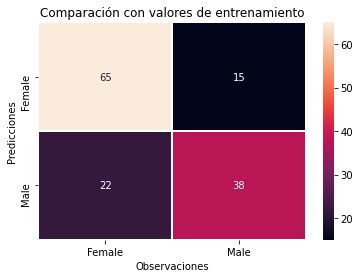

In [30]:
cm=confusion_matrix(y_train,y_train_predict, labels=['Female', 'Male'])
labels=['Female', 'Male']
sns.heatmap(cm, linewidth = 0.5, annot = True, fmt = 'g', xticklabels= labels,yticklabels= labels)
plt.ylabel('Predicciones')
plt.xlabel('Observaciones')
plt.title('Comparación con valores de entrenamiento')
plt.show()

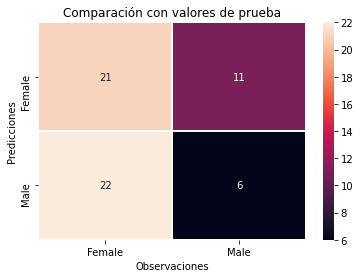

In [32]:
cm=confusion_matrix(y_test,y_test_predict, labels=['Female', 'Male'])
labels=['Female', 'Male']
sns.heatmap(cm, linewidth = 0.5, annot = True, fmt = 'g', xticklabels= labels,yticklabels= labels)
plt.ylabel('Predicciones')
plt.xlabel('Observaciones')
plt.title('Comparación con valores de prueba')
plt.show()

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

      Female       0.75      0.81      0.78        80
        Male       0.72      0.63      0.67        60

    accuracy                           0.74       140
   macro avg       0.73      0.72      0.73       140
weighted avg       0.73      0.74      0.73       140

              precision    recall  f1-score   support

      Female       0.49      0.66      0.56        32
        Male       0.35      0.21      0.27        28

    accuracy                           0.45        60
   macro avg       0.42      0.44      0.41        60
weighted avg       0.43      0.45      0.42        60



__Instrucción 13__

<p style='text-align: justify;'>Analiza tu Árbol de Regresión y tus matrices de confusión y responde las siguientes preguntas:
    
    ¿Qué estamos tratando de predecir con el árbol de regresión?
    ¿Cuál es el significado de la matriz de confusión hecha con los datos de entrenamiento?
    ¿Cuál es el significado de la matriz de confusión hecha con los datos de prueba?
    ¿El árbol de regresión fue satisfactorio para predecir nuestros datos? Justifica tu respuesta.
</p>

Con el árbol estamos tratando de predecir si se trata de un hombre o una mujer basados en los datos de las variables edad, 
ingresos y gastos.

La matriz hecha con los datos de entrenamiento indica la exactitud con la que se clasificaron los datos de entrenamiento. En este caso se puede observar que la mayor parte de los datos (103 observaciones) se clasifica correctamente y solo 37 observaciones estuvieron equivocadas.

La matriz hehca con los datos de prueba sirve para lo mismo, pero ahora evaluando los datos de prueba. En este caso se puede observar que con los datos de prueba no es tan preciso el modelo, pues solo 27 veces clasifica correctamente y comete 33 errores. 

El árbol funciona bien con los datos de entrenamiento, pero con los datos de prueba clasifica mal los datos la mayoría de las veces. Por eso sería conveniente eliminar la condición de 4 niveles y ver el funcionamiento. Usar más datos de entrenamiento también puede mejorar al modelo. 

__Instrucción 14__

<p style='text-align: justify;'>Guarda tu libreta con el nombre de "Actividad4_Nombre del alumno" e insértala en un archivo .zip. La carpeta comprimida debe llevar el nombre de "Actividad4_Nombre del alumno".
    
Por último, carga tu actividad a la plataforma de CANVAS.
</p>